In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import SimpleITK as sitk
from pathlib import Path
# from platipy.imaging.registration.utils import apply_transform
from platipy.imaging import ImageVisualiser
from platipy.imaging.label.utils import get_com
from fitter import Fitter
import matplotlib.pyplot as plt
from scipy.stats import rice

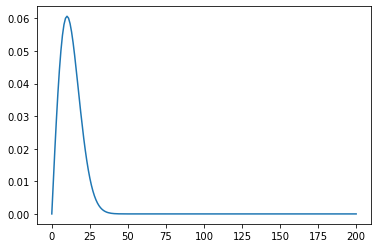

In [25]:
x = np.linspace(0, 200, 201)
y = rice.pdf(x, 0/10, scale=10)
plt.plot(x, y)
plt.show()

In [2]:
patients = ["ACRIN-6698-102212", "ACRIN-6698-103939", "ACRIN-6698-104268", "ACRIN-6698-107700", "ACRIN-6698-116603"]
T1_bs = []
T2_bs = []
T1_scales = []
T2_scales = []
T1_data = []
T2_data = []

modality = "T1"
for patient in patients:
    example = sitk.ReadImage(f"NOISE_SEGMENTATIONS/{patient}/IMG_{modality}.nii.gz")
    seg = sitk.ReadImage(f"NOISE_SEGMENTATIONS/{patient}/noise_segmentation_{modality}.nii.gz")
    array = sitk.GetArrayFromImage(example).flatten()
    mask = sitk.GetArrayFromImage(seg).flatten()
    
    for i in range(1, max(mask)+1):
        datum = array[mask == i]
        T1_data.append(datum)
        b, _, scale = rice.fit(datum, scale=30, floc=0)
        T1_bs.append(b)
        T1_scales.append(scale)
        
modality = "T2"
for patient in patients:
    example = sitk.ReadImage(f"CONVERTED_PROCESSED/{patient}/IMG_{modality}.nii.gz")
    seg = sitk.ReadImage(f"CONVERTED_PROCESSED/{patient}/noise_segmentation_{modality}.nii.gz")
    array = sitk.GetArrayFromImage(example).flatten()
    mask = sitk.GetArrayFromImage(seg).flatten()
    
    for i in range(1, max(mask)+1):
        datum = array[mask == i]
        T2_data.append(datum)
        b, _, scale = rice.fit(datum, scale=30, floc=0)
        T2_bs.append(b)
        T2_scales.append(scale)


C:\Users\arnal\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


In [3]:
# # source_folder = "CONVERTED_PROCESSED/ACRIN-6698-103939"
# source_folder = "CONVERTED_PROCESSED/ACRIN-6698-102212"
# modality = "T2"

# example = sitk.ReadImage(f"{source_folder}/IMG_{modality}.nii.gz")
# seg = sitk.ReadImage(f"{source_folder}/noise_segmentation_{modality}.nii.gz")
# array = sitk.GetArrayFromImage(example).flatten()
# mask = sitk.GetArrayFromImage(seg).flatten()

In [4]:
# data = []
# bs = []
# scales = []
# for i in range(1, max(mask)+1):
#     datum = array[mask == i]
#     data.append(datum)
#     b, _, scale = rice.fit(datum, scale=30, floc=0)
#     bs.append(b)
#     scales.append(scale)

print("T1:")
print(f"b = {np.mean(T1_bs)} +/- {np.std(T1_bs)}")
print(f"sigma = {np.mean(T1_scales)} +/- {np.std(T1_scales)}")
# print(T1_bs)
# print(T1_scales)
# print(list(np.array(T1_bs)*np.array(T1_scales)))
# print([np.mean(datum) for datum in T1_data])

print("")
print("T2:")
print(f"b = {np.mean(T2_bs)} +/- {np.std(T2_bs)}")
print(f"sigma = {np.mean(T2_scales)} +/- {np.std(T2_scales)}")
# print(T2_bs)
# print(T2_scales)
# print(list(np.array(T2_bs)*np.array(T2_scales)))
# print([np.mean(datum) for datum in T2_data])

T1:
b = 6.744778849652661 +/- 6.4681913024494
sigma = 14.528836669846967 +/- 11.689568298149076

T2:
b = 3.630343294199361 +/- 3.546165023741314
sigma = 9.837759461627838 +/- 5.2599496808808395


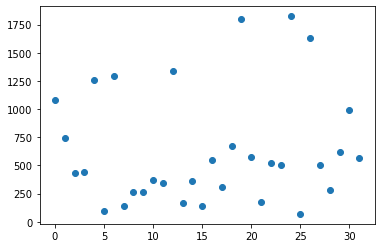

In [5]:
plt.scatter(range(len(T1_data)), [len(datum) for datum in T1_data])
plt.show()

In [15]:
T1_means = np.array([np.mean(datum) for datum in T1_data])
T2_means = np.array([np.mean(datum) for datum in T2_data])
T1_medians = np.array([np.median(datum) for datum in T1_data])
T2_medians = np.array([np.median(datum) for datum in T2_data])
# T1_thresh = np.median(T1_means)
# T2_thresh = np.median(T2_means)
T1_thresh = np.quantile(T1_means, 0.75)
T2_thresh = np.quantile(T2_means, 0.75)

# plt.hist(T1_means)
# plt.show()
# plt.hist(T2_means)
# plt.show()

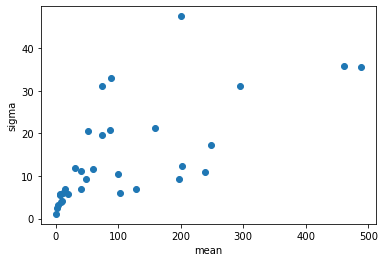

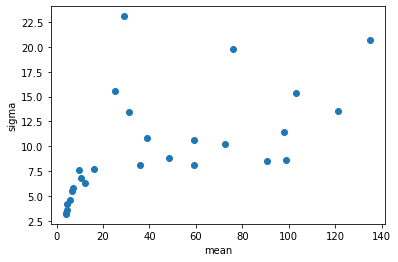

In [12]:
plt.scatter(T1_means, T1_scales)
plt.xlabel("mean")
plt.ylabel("sigma")
plt.savefig("T1_noise.png")
plt.show()
plt.scatter(T2_means, T2_scales)
plt.xlabel("mean")
plt.ylabel("sigma")
plt.savefig("T2_noise.png")
plt.show()

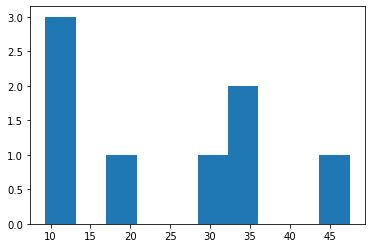

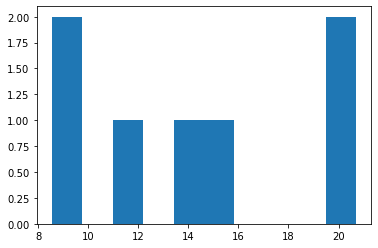

In [8]:
plt.hist(np.array(T1_scales)[T1_means >= T1_thresh])
plt.show()
plt.hist(np.array(T2_scales)[T2_means >= T2_thresh])
plt.show()

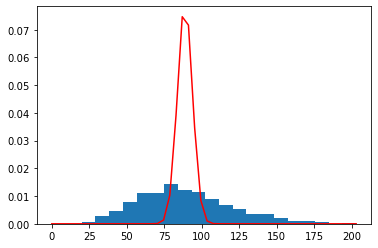

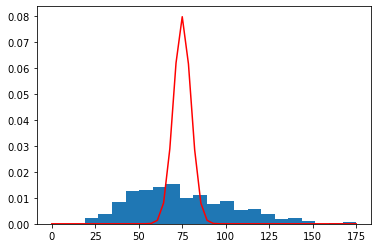

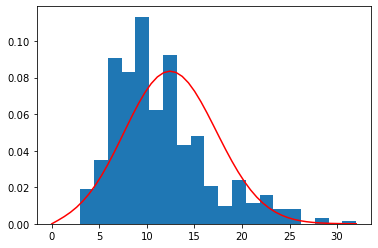

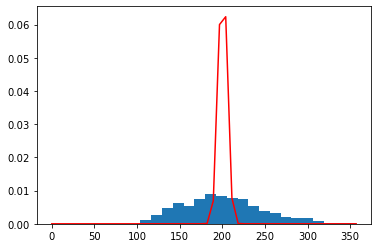

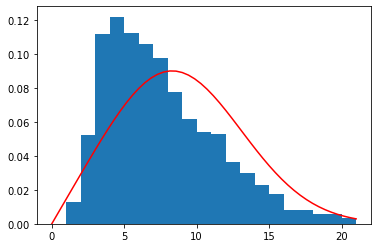

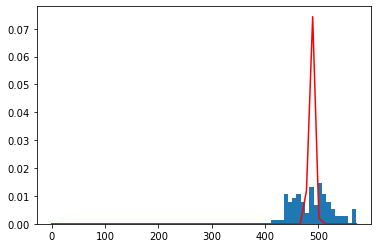

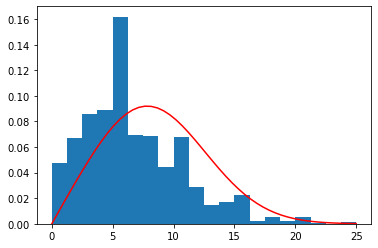

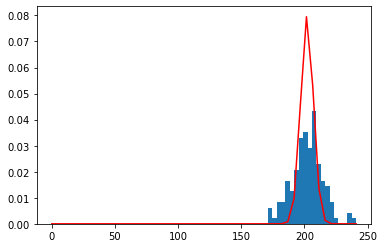

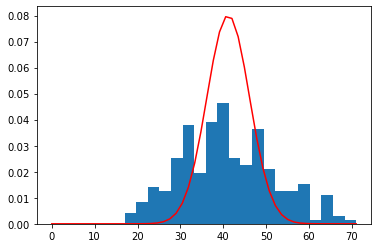

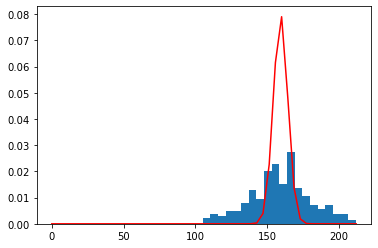

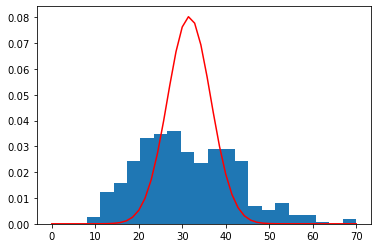

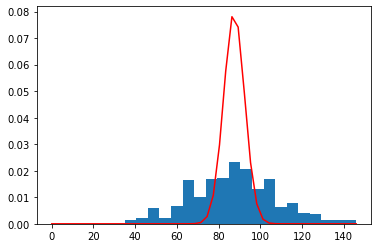

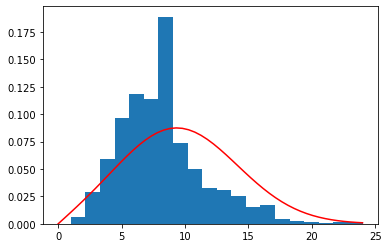

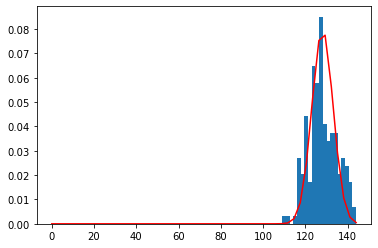

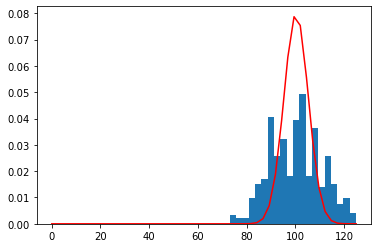

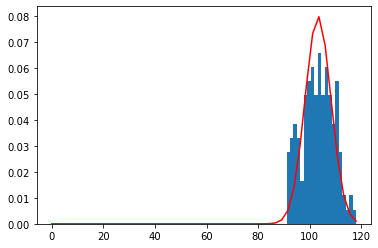

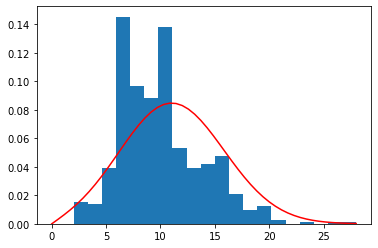

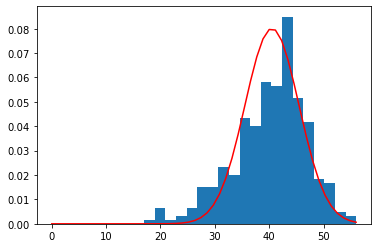

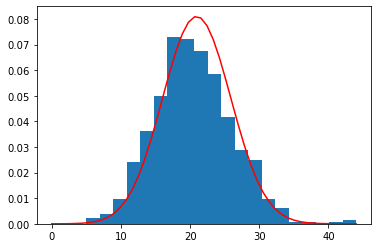

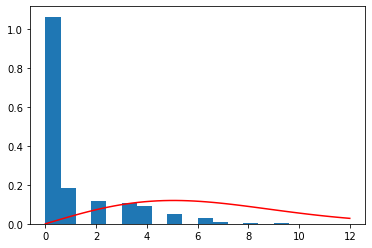

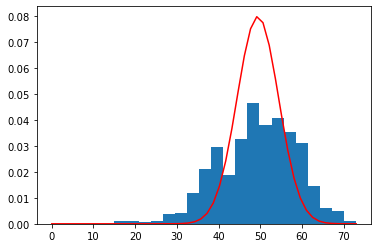

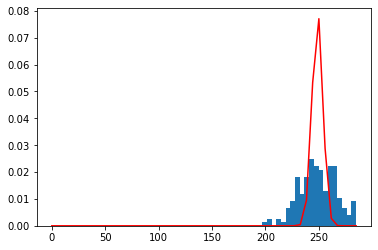

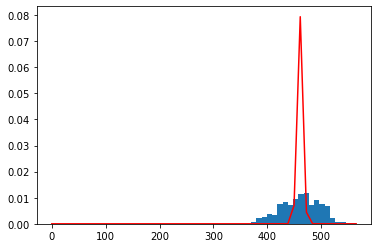

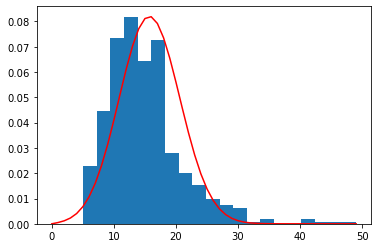

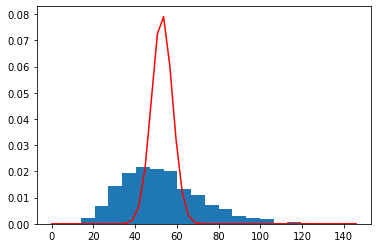

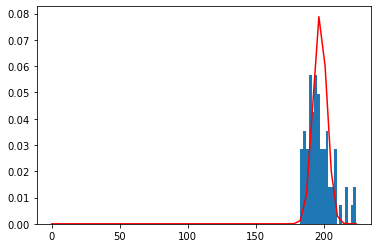

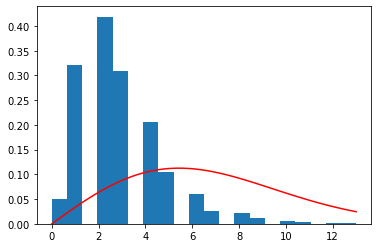

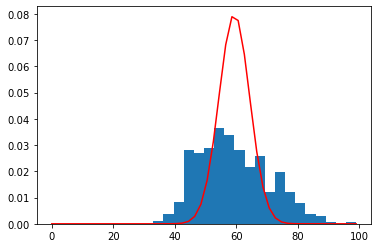

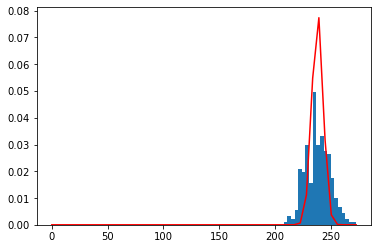

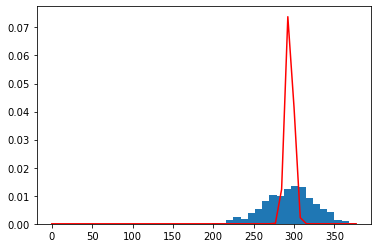

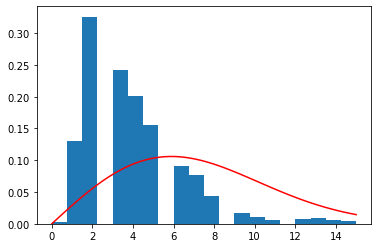

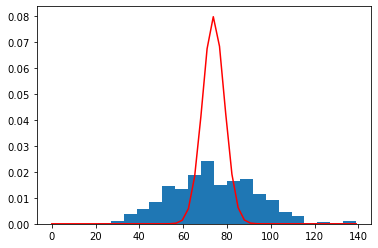

In [17]:
for index in range(len(T1_data)):
    thing = T1_data[index]
    plt.hist(thing, bins=20, density=True)
    x = np.linspace(0, max(thing), 50)
#     y = rice.pdf(x, T1_bs[index], scale=T1_scales[index])
#     y = rice.pdf(x, 2, scale=T1_scales[index])
    y = rice.pdf(x, T1_means[index]/5, scale=5)
    plt.plot(x, y, "-r")
    plt.show()